In [1]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
license_plate_image = 'motorcycle_plate.jpg'

In [8]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(lang_list=['en'])
    return reader.readtext(img_path)

In [9]:
result = recognize_text(license_plate_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[374, 122], [585, 122], [585, 230], [374, 230]],
  '5231',
  0.4160607159137726),
 ([[256, 128], [342, 128], [342, 232], [256, 232]], 'K', 0.3648688793182373),
 ([[615, 141], [725, 141], [725, 233], [615, 233]], 'OD', 0.6405787467956543),
 ([[490, 232], [703, 232], [703, 307], [490, 307]],
  '11.21',
  0.2988470494747162)]

* In the above result the [[374, 122], [585, 122], [585, 230], [374, 230]], is the bounding box vertices
* '5231' is the text in the image
* 0.4160607159137726 is the confidence level of the text in the image

In [14]:
text_only = [word[1] for word in result]
text_only

['5231', 'K', 'OD', '11.21']

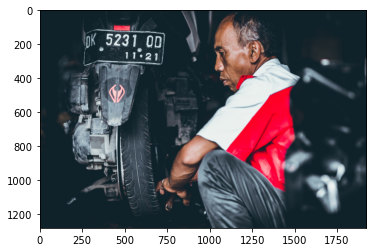

In [10]:
img_1 = cv2.imread(license_plate_image)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [15]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

In [ ]:
overlay_ocr_text(license_plate_image, 'license_plate_image')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
